# `1. `What is logistic regression?

- Another type of generalized linear model
- Used when the response variable is logical. 
- Linear models result in predictions that follow a straight line, logistic models result in predictions that follow a logistic curve, which is S-shaped. 

When the response variable is logical, all the points lie on the and lines, making it difficult to see what is happening. In the video, until you saw the trend line, it wasn't clear how the explanatory variable was distributed on each line.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


C:\Users\AHamdan\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
#this dataset on churn at a European financial services company in 2006.
churn = pd.read_csv('churn.csv')

In [3]:
churn.head()

,has_churned,time_since_first_purchase,time_since_last_purchase
0,0,-1.089221,-0.721322
1,0,1.182983,3.634435
2,0,-0.846156,-0.427582
3,0,0.086942,-0.535672
4,0,-1.166642,-0.672640


 The two explanatory variables are the time since the customer first bought a service and the time since they last bought a service. Respectively, they measure the length of the relationship with the customer and the recency of the customer's activity. The time columns contain negative values because they have been standardized for confidentiality reasons. 

In [4]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   has_churned                400 non-null    int64  
 1   time_since_first_purchase  400 non-null    float64
 2   time_since_last_purchase   400 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


When the response variable is logical, all the points lie on the and lines, making it difficult to see what is happening. In the video, until you saw the trend line, it wasn't clear how the explanatory variable was distributed on each line. This can be solved with a histogram of the explanatory variable, grouped by the response.

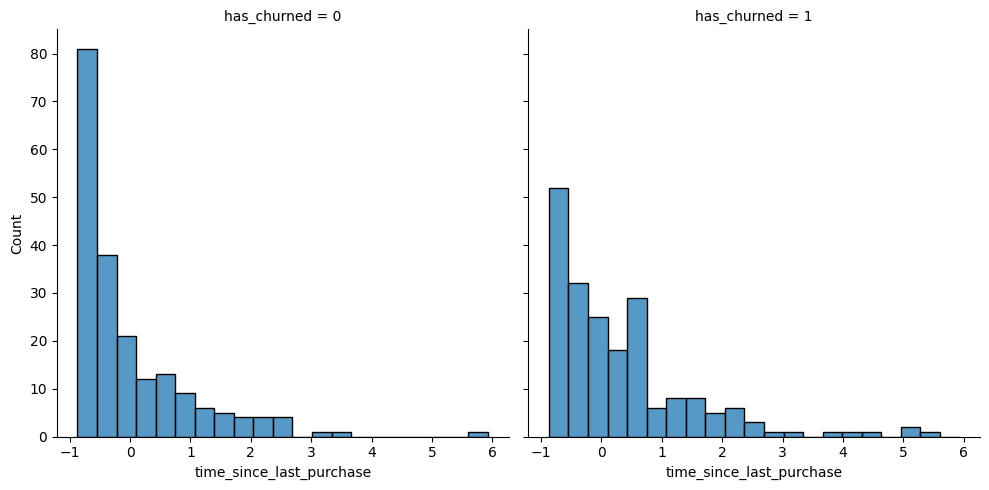

In [5]:
# Create the histograms of time_since_last_purchase split by has_churned
sns.displot (x='time_since_last_purchase', col='has_churned', data = churn)

plt.show()

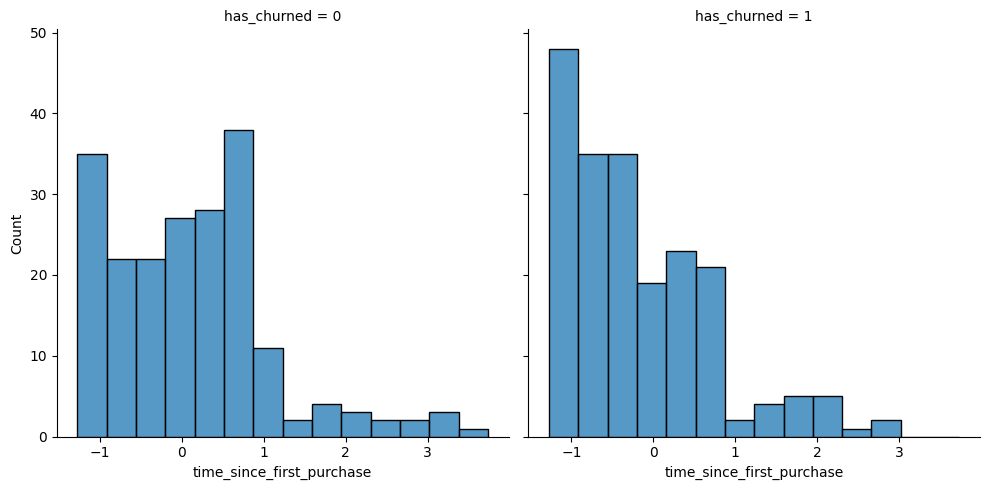

In [6]:
# Redraw the plot with time_since_first_purchase
sns.displot(x='time_since_first_purchase', col='has_churned', data= churn)

plt.show()

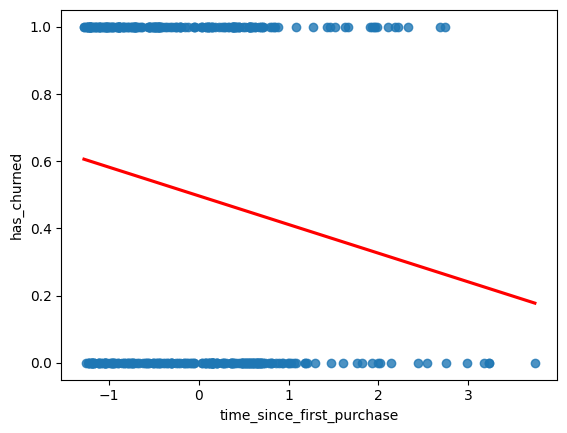

In [7]:
# Draw a linear regression trend line and a scatter plot of time_since_first_purchase vs. has_churned
sns.regplot(x='time_since_first_purchase', y='has_churned', data = churn, ci = None,
            line_kws={"color": "red"})

plt.show()

#### As with linear regressions, regplot() will draw model predictions for a logistic regression by adding **logistic = True**

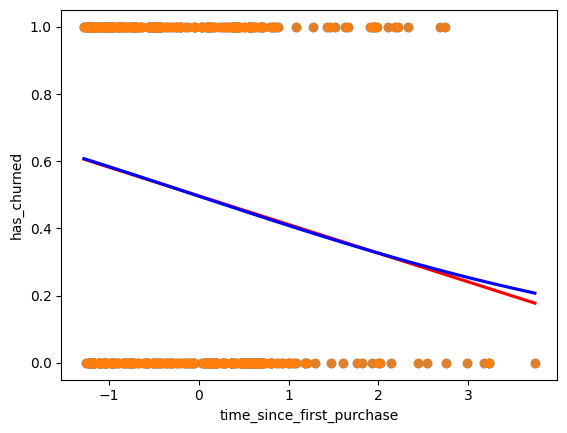

In [8]:
# Draw a logistic regression trend line and a scatter plot of time_since_first_purchase vs. has_churned
sns.regplot(x='time_since_first_purchase', y='has_churned', data = churn, ci = None,
            line_kws={"color": "red"})

#plt.show()
sns.regplot(x="time_since_first_purchase",
            y="has_churned",
            data=churn,
            ci=None,
            line_kws={"color": "blue"},
            logistic = True)

plt.show()

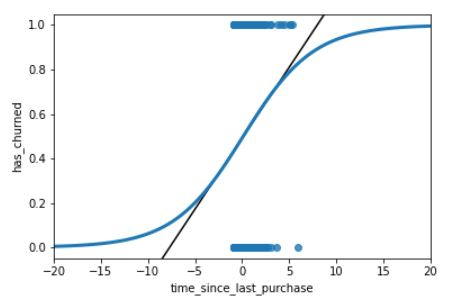

The logistic regression curve never goes below zero or above one. 
To interpret this curve, when the standardized time since last purchase is very small, the probability of churning is close to zero. When the time since last purchase is very high, the probability is close to one. That is, customers who recently bought things are less likely to churn

#### Notice the slight curve in the logistic model trend.

In [9]:
#Import logit
from statsmodels.formula.api import logit

# Fit a logistic regression of churn vs. length of relationship using the churn dataset
mdl_churn_vs_relationship = logit('has_churned ~ time_since_first_purchase', data = churn).fit()

# Print the parameters of the fitted model
print(mdl_churn_vs_relationship.params)

Optimization terminated successfully.
         Current function value: 0.679663
         Iterations 4
Intercept                   -0.015185
time_since_first_purchase   -0.354795
dtype: float64


**The interpretation is a little different; we'll come to that later.**

# `2. `Predictions and odds ratios

In [10]:
# Create explanatory_data
explanatory_data = pd.DataFrame({'time_since_first_purchase': np.arange (-1, 4, 0.25) })

# Create prediction_data
prediction_data = explanatory_data.assign(
  has_churned = mdl_churn_vs_relationship.predict(explanatory_data)
)

# Print the head
print(prediction_data.head())

   time_since_first_purchase  has_churned
0                      -1.00     0.584096
1                      -0.75     0.562401
2                      -0.50     0.540465
3                      -0.25     0.518370
4                       0.00     0.496204


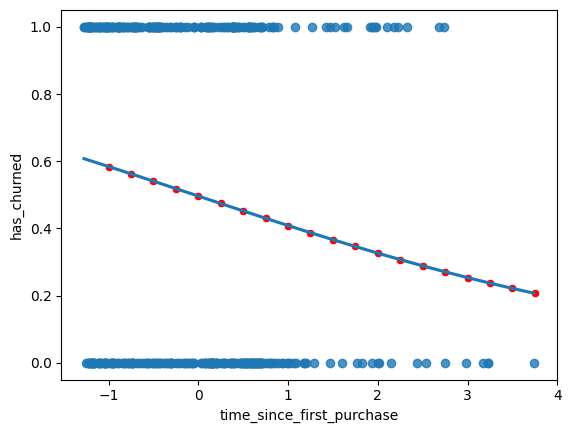

In [11]:
# Create a scatter plot with logistic trend line
sns.regplot(x= 'time_since_first_purchase' , y= 'has_churned', data=churn, ci = None,logistic= True)

# Overlay with prediction_data, colored red
sns.scatterplot(x= 'time_since_first_purchase' , y= 'has_churned', data=prediction_data, color= 'red')

plt.show()

*As expected, these points follow the trend line.*

**But** we need only one of status (Churn - Not Churn)
One simpler prediction you can make, rather than calculating probabilities of a response, is to calculate the most likely response.
- If the probability of churning is less than 0-point-5, the most likely outcome is that they won't churn. 
- If their probability is greater then 0-point-5, it's more likely that they will churn. 

To calculate this, simply round the predicted probabilities using numpy's round() function.

In [12]:
# Update prediction data by adding most_likely_outcome
prediction_data["most_likely_outcome"] = np.round(prediction_data['has_churned'])

# Print the head
print(prediction_data.head())

   time_since_first_purchase  has_churned  most_likely_outcome
0                      -1.00     0.584096                  1.0
1                      -0.75     0.562401                  1.0
2                      -0.50     0.540465                  1.0
3                      -0.25     0.518370                  1.0
4                       0.00     0.496204                  0.0


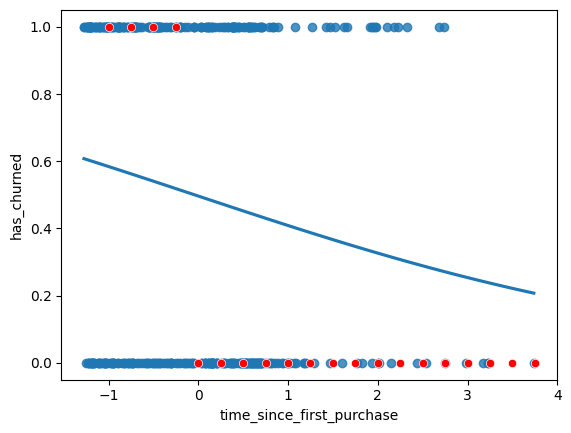

In [13]:
fig = plt.figure()

# Create a scatter plot with logistic trend line (from previous exercise)
sns.regplot(x="time_since_first_purchase",
            y="has_churned",
            data=churn,
            ci=None,
            logistic=True)

# Overlay with prediction_data, colored red
sns.scatterplot(x="time_since_first_purchase",
            y="most_likely_outcome",
            data=prediction_data,
            color='red')

plt.show()

### Odds Ratio

The odds ratio is the probability that something happens, divided by the probability that it doesn't

**Odds Ratio:** $\dfrac{Probability} {(1 - Probability)}$

**Odds Ratio:** $\dfrac{0.25} {(1 - 0.25)} = \dfrac{1} {3}$


In [14]:
# Update prediction data with odds_ratio
prediction_data["odds_ratio"] = prediction_data['has_churned'] / (1- prediction_data['has_churned'])

# Print the head
print(prediction_data.head())

   time_since_first_purchase  has_churned  most_likely_outcome  odds_ratio
0                      -1.00     0.584096                  1.0    1.404400
1                      -0.75     0.562401                  1.0    1.285197
2                      -0.50     0.540465                  1.0    1.176111
3                      -0.25     0.518370                  1.0    1.076284
4                       0.00     0.496204                  0.0    0.984930


In [15]:
prediction_data['most_likely_outcome'].value_counts()

most_likely_outcome
0.0    16
1.0     4
Name: count, dtype: int64

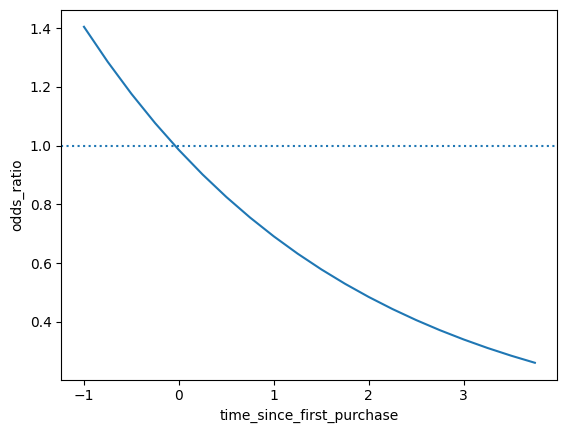

In [16]:
fig = plt.figure()

# Create a line plot of odds_ratio vs time_since_first_purchase
sns.lineplot(x= 'time_since_first_purchase', y='odds_ratio' , data= prediction_data)

# Add a dotted horizontal line at odds_ratio = 1
plt.axhline(y=1, linestyle="dotted")

plt.show()

Here, the dotted line where the odds ratio is one indicates where churning is just as likely as not churning. 
While the predictions are below one, so the chance of not churning is more than the chance of not churning.  the chance of churning is about fourth the chance of not churning. 

#### Log odds ratio

One downside to probabilities and odds ratios for logistic regression predictions is that the prediction lines for each are curved. This makes it harder to reason about what happens to the prediction when you make a change to the explanatory variable. The logarithm of the odds ratio (the "log odds ratio" or "logit") does have a linear relationship between predicted response and explanatory variable. That means that as the explanatory variable changes, you don't see dramatic changes in the response metric - only linear changes.

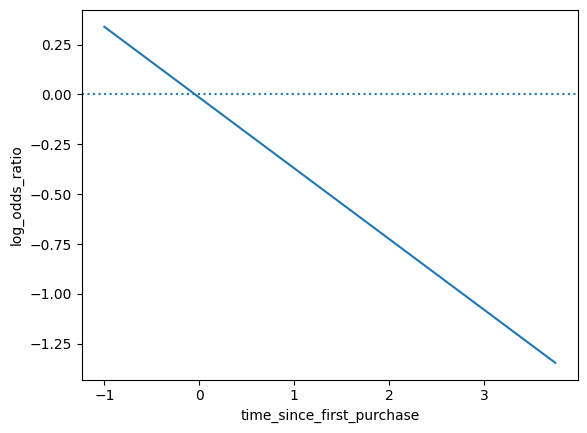

In [17]:
# Update prediction data with log_odds_ratio
prediction_data['log_odds_ratio'] = np.log(prediction_data['odds_ratio'])


# Update prediction data with log_odds_ratio
prediction_data["log_odds_ratio"] = np.log(prediction_data["odds_ratio"])

fig = plt.figure()

# Update the line plot: log_odds_ratio vs. time_since_first_purchase
sns.lineplot(x="time_since_first_purchase",
             y="log_odds_ratio",
             data=prediction_data)

# Add a dotted horizontal line at log_odds_ratio = 0
plt.axhline(y=0, linestyle="dotted")

plt.show()

## Comparing scales

In [18]:
prediction_data.head()

,time_since_first_purchase,has_churned,most_likely_outcome,odds_ratio,log_odds_ratio
0,-1.00,0.584096,1.0,1.404400,0.339610
1,-0.75,0.562401,1.0,1.285197,0.250912
2,-0.50,0.540465,1.0,1.176111,0.162213
3,-0.25,0.518370,1.0,1.076284,0.073514
4,0.00,0.496204,0.0,0.984930,-0.015185


Each way of describing responses has different benefits. 

- Most likely outcome is easiest to understand because the answer is always yes or no, but this lacks precision.
- Probabilities and odds ratios are still fairly easy to understand for a data literate audience. However, the non-linear predictions make it hard to reason about how changes in the explanatory variable will change the response. 
- Log odds ratio is difficult to interpret for individual values, but the linear relationship with the explanatory variables makes it easy to reason about changes. 

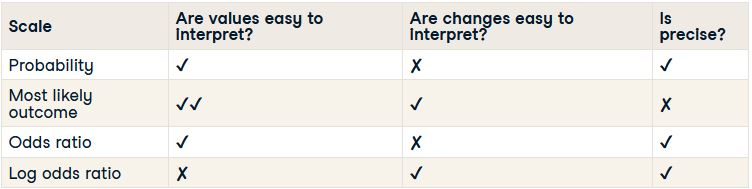

# `3. `Calculating the confusion matrix

A confusion matrix (occasionally called a confusion table) is the basis of all performance metrics for models with a categorical response (such as a logistic regression). It contains the counts of each actual response-predicted response pair. In this case, where there are two possible responses (churn or not churn), there are four overall outcomes.

- **True positive**: The customer churned and the model predicted they would.
- **False positive**: The customer didn't churn, but the model predicted they would.
- **True negative**: The customer didn't churn and the model predicted they wouldn't.
- **False negative**: The customer churned, but the model predicted they wouldn't.


| . | Predicted False | Predicted True |
|-|-| - |
| Actual False|True Negative | False Positive|
| Actual True| False Negative| True Positive|

## 3.1 Confusion matrix: counts of outcoms

In [19]:
# Get the actual responses
actual_response = churn['has_churned']

# Get the predicted responses (most likely)
predicted_response = np.round(mdl_churn_vs_relationship.predict())

# Create outcomes as a DataFrame of both Series
outcomes = pd.DataFrame({'actual_response': actual_response,
                         'predicted_response': predicted_response})

# Print the outcomes
print(outcomes.value_counts(sort = False))

actual_response  predicted_response
0                0.0                   112
                 1.0                    88
1                0.0                    76
                 1.0                   124
Name: count, dtype: int64


 We correctly predicted that 112 customers didn't churn and 124 customers did churn. There were 88 false positives and one 76 false negatives. 

## 3.2 Confusion matrix: from model

The confusion matrix can also be created automatically with the pred_table method. 

[[112.  88.]
 [ 76. 124.]]


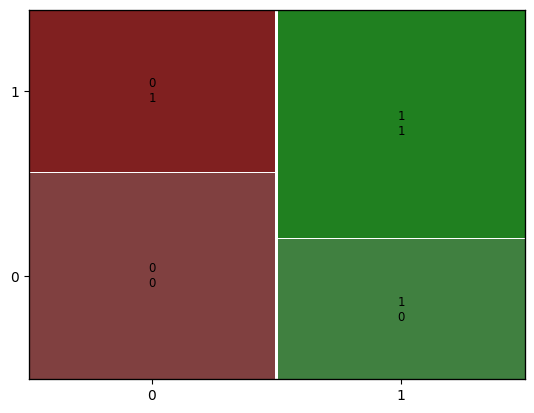

In [20]:
# Import mosaic from statsmodels.graphics.mosaicplot
from statsmodels.graphics.mosaicplot import mosaic

# Calculate the confusion matrix conf_matrix
conf_matrix = mdl_churn_vs_relationship.pred_table()

# Print it
print(conf_matrix)

# Draw a mosaic plot of conf_matrix
mosaic(conf_matrix)
plt.show()

# `4. ` performance metrics

## Accuracy

- The proportion of customers where the model correctly predict whether on not they churned
- This is the proportion of correct predictions. That is, the number of true negatives plus the true positives, divided by the total number of observations. **Higher accuracy is better.**

$$Accuracy=\dfrac {TN + TP} {TN + TP + FN + TP}$$

In [23]:
# Extract TN, TP, FN and FP from conf_matrix
TN = conf_matrix[0,0]
TP = conf_matrix[1,1]
FN = conf_matrix[1,0]
FP = conf_matrix[0,1]
print('TN:', TN)
print('TP:', TP)
print('FN:', FN)
print('FP:', FP)
# Calculate and print the accuracy
accuracy = (TN + TP) / (TN+FN+FP+TP)
print("accuracy: ", accuracy)

TN: 112.0
TP: 124.0
FN: 76.0
FP: 88.0
accuracy:  0.59


### Sensitivity (Recall)

This is the proportion of observations where the actual response was true where the model also predicted that they were true. 
That is, the number of true positives divided by the sum of the false negatives and true positives. **Higher sensitivity is better.**

$$Sensitivity=\dfrac {TP} {TP +FN}$$

In [24]:
# Calculate and print the senstivity
senstivity = (TP) / (TP + FN)
print("senstivity: ", senstivity)

senstivity:  0.62


### Specificity
The proportion of observations where the actual response was false where the model also predicted that they were false. That is, the number of true negatives divided by the sum of the true negatives and false positives. 

- Higher specificity is better, though there is often a **trade-off** where improving specificity will decrease sensitivity, or increasing sensitivity will decrease specificity.

$$Specificity=\dfrac {TN} {TN + FP}$$

In [25]:
# Calculate and print the specificity
specificity = (TN) / (TN + FP)
print("specificity: ", specificity)

specificity:  0.56


### Persiscion

Precision is the number of true positives divided by the sum of all positive predictions.

$$ Persiscion = \dfrac {TP} {TP + FP} $$

In [28]:
precision = (TP) / (TP + FP)
print("precision: ", precision)

precision:  0.5849056603773585


### F1- Score: 

Harmonic mean of precision and recall. This metric gives equal weight to precision and recall

$$ F1-Score = 2 * \dfrac{Precision * Recall} {Precision + Recall} $$

In [29]:
F1_score = 2 * ((precision * senstivity) / (precision + senstivity))
F1_score

0.6019417475728155